In [30]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

from pilco.policies import RBFPolicy, TransformedPolicy
from pilco.transforms import SineTransform

import matplotlib.pyplot as plt

In [121]:
def plot_pendulum_policy(policy, s_points=60, s_dot_points=30):
    s_linspace = tf.cast(tf.linspace(-3*np.pi, 2 * np.pi, s_points), dtype=tf.float64)

    s_dot_linspace = tf.cast(tf.linspace(-8., 8., s_dot_points), dtype=tf.float64)

    s_grid, s_dot_grid = tf.meshgrid(s_linspace, s_dot_linspace)

    grid = tf.stack([s_grid, s_dot_grid], axis=-1)

    grid = tf.reshape(grid, (-1, 2))
    
    actions = tf.stack([t_policy(point) for point in grid], axis=0)
    actions = tf.reshape(actions, (s_dot_points, s_points))
    
    centroids = rbf_policy.rbf_locs().numpy()

    plt.figure(figsize=(12, 8))
    contour = plt.contourf(s_grid, s_dot_grid, actions, cmap='coolwarm', alpha=0.5, vmin=-2, vmax=2)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k')
    cbar = plt.colorbar(contour)
    plt.xlabel("Theta")
    plt.ylabel("Theta dot")
    plt.tight_layout()
    plt.show()

In [122]:
rbf_policy = RBFPolicy(state_dim=2, 
                       action_dim=1, 
                       num_rbf_features=10,
                       dtype=tf.float64)

t_policy = TransformedPolicy(policy=rbf_policy,
                             transform=SineTransform(lower=-2,
                                                     upper=2))

#t_policy.reset()

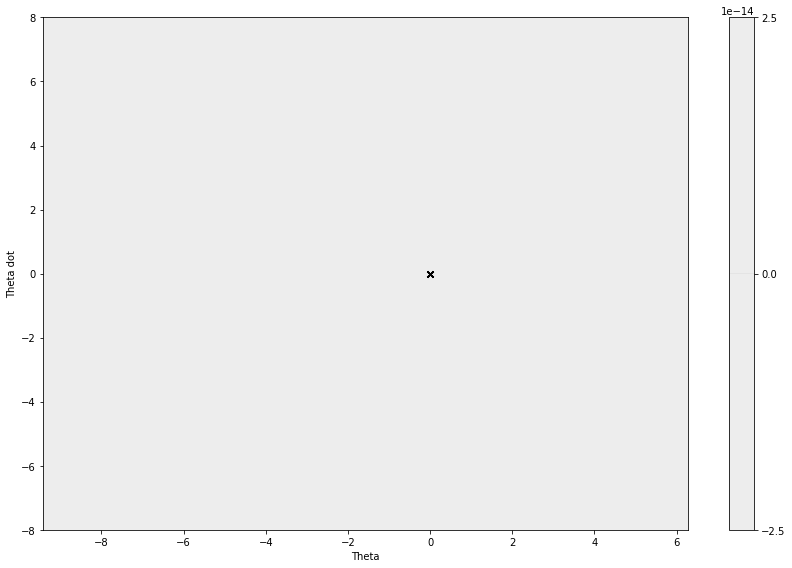

In [123]:
plot_pendulum_policy(t_policy)

In [8]:
import tensorflow as tf

indices = [[1, 0]]
params = [[3, 4]]

tf.gather_nd(params, indices)

InvalidArgumentError: indices[0] = [1, 0] does not index into param shape [1,2] [Op:GatherNd]